In [2]:
#importing the required packs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from skimage import color
from skimage import io
from imutils import paths



In [3]:
import tensorflow as tf
import keras


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(512, 512)


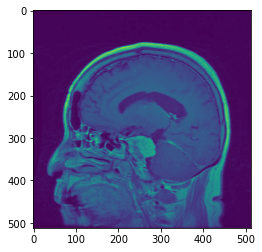

In [5]:
#1. IMAGE PRE-PROCESSING
#The actions in this section will help the main SVM model to work with the images provided and preferably also reduce the
# size/shape of the data so that the memory of the code will not exceed the limit Jupyter Notebook has. 

#Creating a path for the source dataset (which are the images) and storing it in a list.
path=(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\image")
images_list= []
images_paths = sorted(list(paths.list_images(path)))

#One of our first tasks will be to convert the pixels of the images into an array form. 
#To do this, we must first make sure that the images provided are in grayscale.
for path in images_paths:
    file=cv2.imread(path)
    images_grayscale = cv2.cvtColor(file,cv2.COLOR_BGR2GRAY)
    images_list.append(images_grayscale)


    
plt.imshow(images_list[0])
print(images_list[0].shape)

#This prepares the labels so they can be processed: 
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")
Images = []
Labels = []

In [6]:
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")


In [7]:
all_labels=list(set(file_labels['label'].tolist()))
print('All possible labels:', all_labels)
labels_map = {all_labels[x]:x for x in range (len(all_labels))}
print(labels_map)

All possible labels: ['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']
{'pituitary_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'glioma_tumor': 3}


In [8]:
#One hot encoding
from tensorflow import one_hot
one_hot_matrix = np.zeros([len(file_labels['file_name'].tolist()),len(all_labels)])
for x in range(one_hot_matrix.shape[0]):
    one_hot_matrix[x, labels_map[file_labels['label'].iloc[x]]]=1
                

In [9]:
print(one_hot_matrix)
encoded_labels=one_hot_matrix

for x in range (0,3000):
    Images.append(images_list[x])

Labels.append(one_hot_matrix)


[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [10]:
Images=np.array(Images)

print(Images.shape)

(3000, 512, 512)


In [11]:
#image_array = cv2.resize(img_array, (img_size,img_size))
#print(Images.shape)
#Images_normalized=(Images)/255.0
#print(Images_normalized.shape)
#Images_reshaped=Images_normalized.reshape(-1,128,128,1)
#print(Images_reshaped.shape)


In [12]:
 Images, encoded_labels = shuffle(Images,encoded_labels)
x_train, x_test, y_train, y_test = train_test_split(Images,encoded_labels, train_size=0.8, random_state=1)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 512, 512)
(2400, 4)
(600, 512, 512)
(600, 4)


In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

In [26]:
#input_layer = Input((30,24,48))

#model = Conv2D(20,(5,5), input_shape = (30,24,48), activation = "relu", strides = 1, padding = "valid")(input_layer)
#model = MaxPooling2D(pool_size=(2,2))(model)        
#model = Conv2D(50, (5,5), use_bias = 50)(model)    
#model = MaxPooling2D(pool_size=(2,2))(model)  
#model = Flatten()(model)
#model = Dense(20, activation = "relu")(model)
#model = tf.expand_dims(model, axis=-1)
#model = LSTM(50, activation="relu", return_sequences=True)(model)

In [37]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model.add(MaxPool2D())
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=12, activation="relu"))
model.add(Dense(units=4, activation="softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
68/68 [==============================] - 2407s 35s/step - loss: 8.7323 - accuracy: 0.2995 - val_loss: 1.3711 - val_accuracy: 0.3458
Epoch 2/10
68/68 [==============================] - 2556s 38s/step - loss: 1.2783 - accuracy: 0.4139 - val_loss: 1.1136 - val_accuracy: 0.4250
Epoch 3/10
68/68 [==============================] - 2016s 30s/step - loss: 1.0380 - accuracy: 0.5778 - val_loss: 0.9305 - val_accuracy: 0.5833
Epoch 4/10
68/68 [==============================] - 1548s 23s/step - loss: 0.8412 - accuracy: 0.6898 - val_loss: 0.9189 - val_accuracy: 0.7000
Epoch 5/10
68/68 [==============================] - 1490s 22s/step - loss: 0.6692 - accuracy: 0.7991 - val_loss: 0.8110 - val_accuracy: 0.7125
Epoch 6/10
68/68 [==============================] - 1476s 22s/step - loss: 0.4602 - accuracy: 0.8537 - val_loss: 0.8767 - val_accuracy: 0.7500
Epoch 7/10
68/68 [==============================] - 1454s 21s/step - loss: 0.2870 - accuracy: 0.8995 - val_loss: 0.8410 - val_accuracy: 0.7750

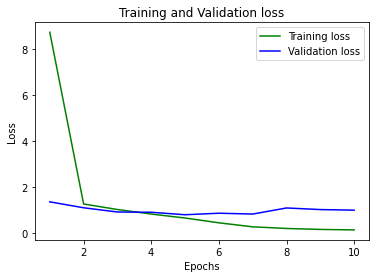

In [38]:
loss_training = history.history['loss']
loss_validation = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'orange', label='Validation Accuracy')
plt.title('Accuracy progression with epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [229]:
from tabulate import tabulate
col_names = ["Loss","Validation Loss", "Accuracy","Validation Accuracy"]
print(tabulate(history.history, headers=col_names))

      Loss    Validation Loss    Accuracy    Validation Accuracy
----------  -----------------  ----------  ---------------------
11.8382              0.412037    0.984344               0.625
 0.849526            0.698611    0.828644               0.670833
 0.63049             0.768056    0.853117               0.741667
 0.473515            0.834722    0.721924               0.8
 0.34391             0.873611    0.838722               0.775
 0.262651            0.909259    0.836014               0.8
 0.192226            0.94537     0.994498               0.758333
 0.127054            0.955093    1.31711                0.8
 0.138832            0.962037    1.698                  0.795833
 0.0863073           0.974537    1.45835                0.804167


In [49]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model_2.add(MaxPool2D())
model_2.add(Dropout(0.1))
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model_2.add(MaxPool2D())
model_2.add(Dropout(0.1))
model_2.add(Flatten())
model_2.add(Dense(units=30, activation="relu"))
model_2.add(Dense(units=12, activation="relu"))
model_2.add(Dense(units=4, activation="softmax"))

model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_2 = model_2.fit(Images,encoded_labels,validation_split=0.2,epochs=10)

Epoch 1/10
75/75 [==============================] - 2196s 29s/step - loss: 35.4912 - accuracy: 0.3692 - val_loss: 1.1836 - val_accuracy: 0.4617
Epoch 2/10
75/75 [==============================] - 2098s 28s/step - loss: 0.8714 - accuracy: 0.6583 - val_loss: 0.6704 - val_accuracy: 0.7800
Epoch 3/10
75/75 [==============================] - 2844s 38s/step - loss: 0.4889 - accuracy: 0.8250 - val_loss: 0.6610 - val_accuracy: 0.7950
Epoch 4/10
75/75 [==============================] - 2939s 39s/step - loss: 0.2724 - accuracy: 0.9038 - val_loss: 0.5931 - val_accuracy: 0.8333
Epoch 5/10
75/75 [==============================] - 2796s 37s/step - loss: 0.1813 - accuracy: 0.9396 - val_loss: 0.7180 - val_accuracy: 0.8467
Epoch 6/10
75/75 [==============================] - 1829s 24s/step - loss: 0.1395 - accuracy: 0.9558 - val_loss: 0.6228 - val_accuracy: 0.8517
Epoch 7/10
75/75 [==============================] - 1630s 22s/step - loss: 0.0761 - accuracy: 0.9737 - val_loss: 0.8425 - val_accuracy: 0.853

In [48]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model.add(MaxPool2D())
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=4, activation="softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(Images,encoded_labels,validation_split=0.2,epochs=10)

Epoch 1/10
75/75 [==============================] - 2524s 34s/step - loss: 70.3859 - accuracy: 0.3050 - val_loss: 1.3820 - val_accuracy: 0.3033
Epoch 2/10
75/75 [==============================] - 2627s 35s/step - loss: 1.3019 - accuracy: 0.4263 - val_loss: 0.8878 - val_accuracy: 0.6367
Epoch 3/10
75/75 [==============================] - 2500s 33s/step - loss: 0.7437 - accuracy: 0.7021 - val_loss: 0.6973 - val_accuracy: 0.7267
Epoch 4/10
75/75 [==============================] - 2308s 31s/step - loss: 0.5647 - accuracy: 0.7854 - val_loss: 0.8159 - val_accuracy: 0.7700
Epoch 5/10
75/75 [==============================] - 3113s 42s/step - loss: 0.4124 - accuracy: 0.8637 - val_loss: 0.7607 - val_accuracy: 0.8133
Epoch 6/10
75/75 [==============================] - 2300s 31s/step - loss: 0.2878 - accuracy: 0.9079 - val_loss: 0.6688 - val_accuracy: 0.8317
Epoch 7/10
75/75 [==============================] - 2513s 34s/step - loss: 0.2043 - accuracy: 0.9325 - val_loss: 0.7832 - val_accuracy: 0.830

In [ ]:
loss_training = history_2.history['loss']
loss_validation = history_2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
model_3 = Sequential()
model_3.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model_3.add(MaxPool2D())
model_3.add(Dropout(0.2))
model_3.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model_3.add(MaxPool2D())
model_3.add(Dropout(0.1))
model_3.add(Flatten())
model_3.add(Dense(units=30, activation="relu"))
model_3.add(Dense(units=12, actvation="relu"))
model_3.add(Dense(units=4, activation="softmax"))

model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_3 = model_3.fit(Images,encoded_labels,validation_split=0.2,epochs=10)

Epoch 1/10
75/75 [==============================] - 2114s 28s/step - loss: 37.2399 - accuracy: 0.4450 - val_loss: 0.9099 - val_accuracy: 0.6150
Epoch 2/10
75/75 [==============================] - 2296s 31s/step - loss: 0.7626 - accuracy: 0.7029 - val_loss: 0.7343 - val_accuracy: 0.7283
Epoch 3/10
75/75 [==============================] - 2632s 35s/step - loss: 0.5172 - accuracy: 0.8179 - val_loss: 0.6103 - val_accuracy: 0.8050
Epoch 4/10
75/75 [==============================] - 2882s 38s/step - loss: 0.3203 - accuracy: 0.8958 - val_loss: 0.5956 - val_accuracy: 0.8200
Epoch 5/10
75/75 [==============================] - 2505s 33s/step - loss: 0.1991 - accuracy: 0.9283 - val_loss: 0.7194 - val_accuracy: 0.8283
Epoch 6/10
75/75 [==============================] - 2358s 32s/step - loss: 0.1312 - accuracy: 0.9542 - val_loss: 0.7743 - val_accuracy: 0.8433
Epoch 7/10
75/75 [==============================] - 2567s 34s/step - loss: 0.1083 - accuracy: 0.9633 - val_loss: 0.7374 - val_accuracy: 0.846

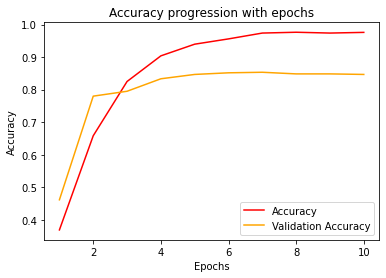

In [51]:
accuracy = history_2.history['accuracy']
validation_accuracy = history_2.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'orange', label='Validation Accuracy')
plt.title('Accuracy progression with epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

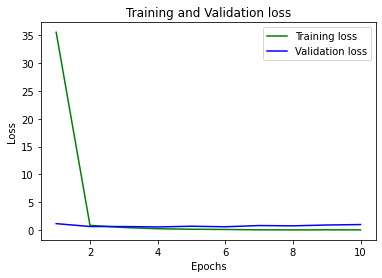

In [52]:
loss_training = history_2.history['loss']
loss_validation = history_2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

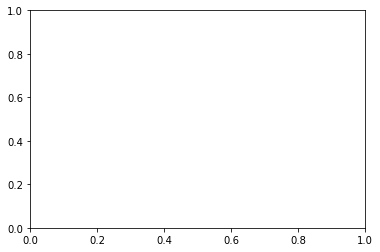

In [56]:
loss_training = history_2.history['loss']
loss_validation = history_2.history['val_loss']
epochs = range(2,11)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss, after the first epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()